<a href="https://colab.research.google.com/github/frasercrichton/fastai2-learning/blob/master/nbs/TripleChaserFastAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
bs = 64     # default batch size
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install fastai2 -q
!pip install utils
from utils import *
from fastai2.vision.all import *


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  25115      0 --:--:-- --:--:-- --:--:-- 25115
OK
60 packages can be upgraded. Run 'apt list --upgradable' to see them.
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,60000)


<IPython.core.display.Javascript object>

Authenticate against GCP related

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!rm -rf "data" 
!mkdir "data"
!rm -rf "download" 
!mkdir "download"
project_id = "forensic-265906"
!gcloud config set project {project_id}
!gsutil -m cp -r gs://forensic-architecture-machine-learning/canisters/canisters.zip download/canisters.zip


Updated property [core/project].
Copying gs://forensic-architecture-machine-learning/canisters/canisters.zip...
\ [1/1 files][276.4 MiB/276.4 MiB] 100% Done                                    
Operation completed over 1 objects/276.4 MiB.                                    


In [ ]:
%%capture
!rm -rf "data" 
!unzip "download/canisters.zip" 

## Examine the contents of the bucket

Lets get the bucket and have a look at how it's annotated . . .

In [ ]:
!ls data/canisters/real_val/

ann  img


In [ ]:

path = Path('data/canisters/real_val/'); path

Path('data/canisters/real_val')

Now lets see some of those images

In [ ]:
annotations_path = path/'ann'
images_path = path /'img'
 #augmentations = augmentations

fnames = get_image_files(images_path)
fnames

(#265) [Path('data/canisters/real_val/img/1550508269245.png'),Path('data/canisters/real_val/img/1550245770572.png'),Path('data/canisters/real_val/img/1550488922236.jpeg'),Path('data/canisters/real_val/img/CSfedgrenade.jpeg'),Path('data/canisters/real_val/img/1550488923054.jpeg'),Path('data/canisters/real_val/img/1550226400476.png'),Path('data/canisters/real_val/img/1550245122780.png'),Path('data/canisters/real_val/img/1548772651231.png'),Path('data/canisters/real_val/img/20190220__1550160360736.jpeg'),Path('data/canisters/real_val/img/1550488908591.jpeg')...]

In [ ]:
images = list(
  sorted(
    filter(
      lambda _pth: _pth.suffix.lstrip(".").lower()
      in {"jpeg", "jpg", "png"},
      images_path.iterdir(),
    )
  )
)
images

[Path('data/canisters/real_val/img/1000w_q95.jpeg'),
 Path('data/canisters/real_val/img/131481_CS_gas_.jpeg'),
 Path('data/canisters/real_val/img/1548757385802.png'),
 Path('data/canisters/real_val/img/1548757432354.png'),
 Path('data/canisters/real_val/img/1548758142404.png'),
 Path('data/canisters/real_val/img/1548758242906.png'),
 Path('data/canisters/real_val/img/1548758656546.png'),
 Path('data/canisters/real_val/img/1548759102342.png'),
 Path('data/canisters/real_val/img/1548760975960.png'),
 Path('data/canisters/real_val/img/1548772566256.jpeg'),
 Path('data/canisters/real_val/img/1548772566292.jpeg'),
 Path('data/canisters/real_val/img/1548772575238.jpeg'),
 Path('data/canisters/real_val/img/1548772589172.jpeg'),
 Path('data/canisters/real_val/img/1548772620114.jpeg'),
 Path('data/canisters/real_val/img/1548772649231.png'),
 Path('data/canisters/real_val/img/1548772650097.png'),
 Path('data/canisters/real_val/img/1548772650502.jpeg'),
 Path('data/canisters/real_val/img/15487726

In [ ]:

annotations = [
   annotations_path / f"{image_file.name}.json"             
   for image_file in images
  ]
#annotations
    
annotationsDict = { 
  image_file.name : 
  annotations_path / f"{image_file.name}.json"           
  for image_file in images
}
annotationsDict

{'1000w_q95.jpeg': Path('data/canisters/real_val/ann/1000w_q95.jpeg.json'),
 '131481_CS_gas_.jpeg': Path('data/canisters/real_val/ann/131481_CS_gas_.jpeg.json'),
 '1548757385802.png': Path('data/canisters/real_val/ann/1548757385802.png.json'),
 '1548757432354.png': Path('data/canisters/real_val/ann/1548757432354.png.json'),
 '1548758142404.png': Path('data/canisters/real_val/ann/1548758142404.png.json'),
 '1548758242906.png': Path('data/canisters/real_val/ann/1548758242906.png.json'),
 '1548758656546.png': Path('data/canisters/real_val/ann/1548758656546.png.json'),
 '1548759102342.png': Path('data/canisters/real_val/ann/1548759102342.png.json'),
 '1548760975960.png': Path('data/canisters/real_val/ann/1548760975960.png.json'),
 '1548772566256.jpeg': Path('data/canisters/real_val/ann/1548772566256.jpeg.json'),
 '1548772566292.jpeg': Path('data/canisters/real_val/ann/1548772566292.jpeg.json'),
 '1548772575238.jpeg': Path('data/canisters/real_val/ann/1548772575238.jpeg.json'),
 '1548772589

In [ ]:
def label_func(x):
  image_name = x.name
  #annotation_data = json.loads(annotations[idx].read_text())
  file = annotationsDict[image_name]
  # print(file)
  annotation_data = json.loads(file.read_text())
  # print(annotation_data)
  if annotation_data["objects"]:
    return annotation_data["objects"][0]["classTitle"]
  else: 
    return "label"
label_func(Path('1550508269245.png'))


'canister-general-bbox'

In [ ]:
doc(Path.absolute)


Path.absolute(self)
Return an absolute version of this path.  This function works
even if the path doesn't point to anything.

No normalization is done, i.e. all '.' and '..' will be kept along.
Use resolve() to get the canonical path to a file.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


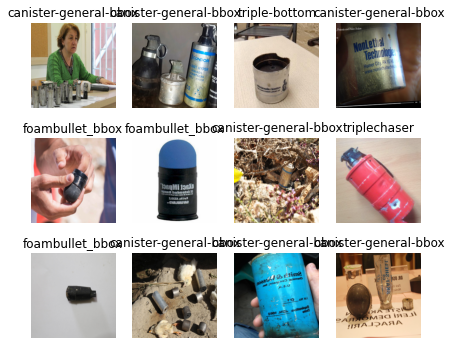

In [ ]:
    
#def label_func(x): return x.parent.name

dls = ImageDataLoaders.from_path_func(images_path, fnames, label_func,
                                      item_tfms=RandomResizedCrop(460, min_scale=0.75), bs=bs//2,
                                     batch_tfms=[*aug_transforms(size=299, max_warp=0), Normalize.from_stats(*imagenet_stats)])
# , item_tfms=Resize(460), bs=bs, batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)]
dls.show_batch(max_n=12, figsize=(7,6))

In [ ]:
print(dls.vocab)
len(dls.vocab),dls.c

(#8) ['canister-general-bbox','foambullet_bbox','label','triple-bottom','triple-top','triple_bottom_bitmap','triple_chaser_bitmap','triplechaser']


(8, 8)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.527198,3.053000,0.943396,00:15
1,3.297839,1.639494,0.566038,00:13
2,2.743671,1.104333,0.339623,00:13
3,2.309640,0.941052,0.245283,00:13
4,1.956996,1.086934,0.320755,00:13
5,1.674295,1.092097,0.245283,00:13
6,1.432679,1.058704,0.226415,00:14
7,1.242303,0.993992,0.226415,00:13
8,1.099303,0.944548,0.226415,00:13
9,0.957479,0.930380,0.226415,00:13


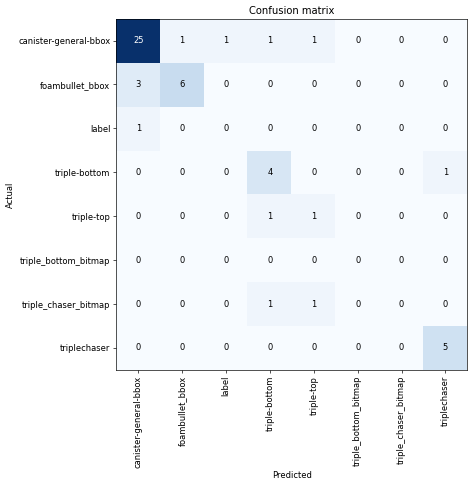

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)